In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv('Admission_Prediction.csv') # reading the CSV file

In [4]:
df.head() # cheking the first five rows from the dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
df.info() # printing the summary of the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
#to replace the missing values in the 'GRE Score' column with the mode of the column
# Mode has been used here to replace the scores with the most occuring scores so that data follows the general trend


In [7]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
#to replace the missing values in the 'GRE Score' column with the mode of the column
# Mode has been used here to replace the scores with the most occuring scores so that data follows the general trend

In [8]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)
#to replace the missing values in the 'University Rating' column with the mode of the column
# Mean has been used here to replace the scores with the average score

In [9]:
# dropping the 'Chance of Admit' and 'serial number' as they are not going to be used as features for prediction
x=df.drop(['Chance of Admit','Serial No.'],axis=1)

In [10]:
# 'Chance of Admit' is the target column which shows the probability of admission for a candidate
y=df['Chance of Admit']

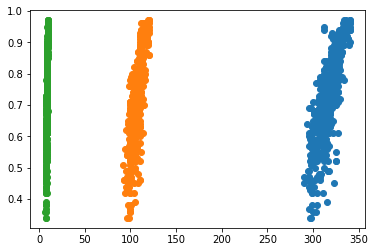

In [11]:
plt.scatter(df['GRE Score'],y) # Relationship between GRE Score and Chance of Admission
plt.scatter(df['TOEFL Score'],y) # Relationship between TOEFL Score and Chance of Admission
plt.scatter(df['CGPA'],y) # Relationship between CGPA and Chance of Admission

In [12]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33, random_state=100)

In [13]:
# fitting the date to the Linear regression model
# from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x,train_y)
# reg.fit(train_x, train_y)

In [16]:
train_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
221,316.0,110.0,3.121649,3.5,4.0,8.56,0
435,309.0,105.0,2.000000,2.5,4.0,7.68,0
335,325.0,111.0,4.000000,4.0,4.5,9.11,1
476,304.0,104.0,3.000000,2.5,2.0,8.12,0
80,312.0,105.0,3.000000,2.0,3.0,8.02,1
...,...,...,...,...,...,...,...
343,305.0,103.0,2.000000,2.5,3.5,8.13,0
359,321.0,107.0,2.000000,2.0,1.5,8.44,0
323,305.0,102.0,2.000000,2.0,2.5,8.18,0
280,311.0,102.0,3.000000,4.5,4.0,8.64,1


In [17]:
train_y

221    0.75
435    0.55
335    0.83
476    0.62
80     0.50
       ... 
343    0.59
359    0.81
323    0.62
280    0.68
8      0.50
Name: Chance of Admit, Length: 335, dtype: float64

In [14]:
# calucltaing the accuracy of the model
from sklearn.metrics import r2_score
score= r2_score(reg.predict(test_x),test_y)

In [18]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [19]:
# prediction using the saved model.
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

0.9957821919825967
